# **Fraud Detection in Financial Transactions**
**Problem Statement:** Develop a system to detect fraudulent transactions in real-time to mitigate financial risks.

Importing the important libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Data

In [14]:
df = pd.read_csv('creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


PCA (Principal Component Analysis) is already applied on this data .

# EDA

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
df.shape

(284807, 31)

In [19]:
df.duplicated().sum()

1081

In [21]:
df = df.drop_duplicates()
df.shape

(283726, 31)

In [17]:
df['Class'].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='Class', ylabel='count'>

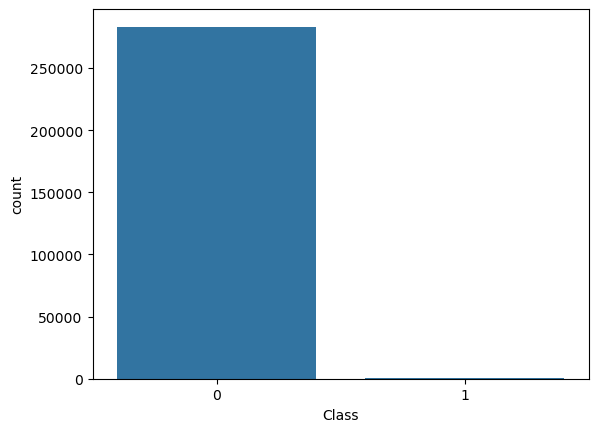

In [23]:
sns.countplot(x='Class', data=df)

In [24]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

How data is distributed

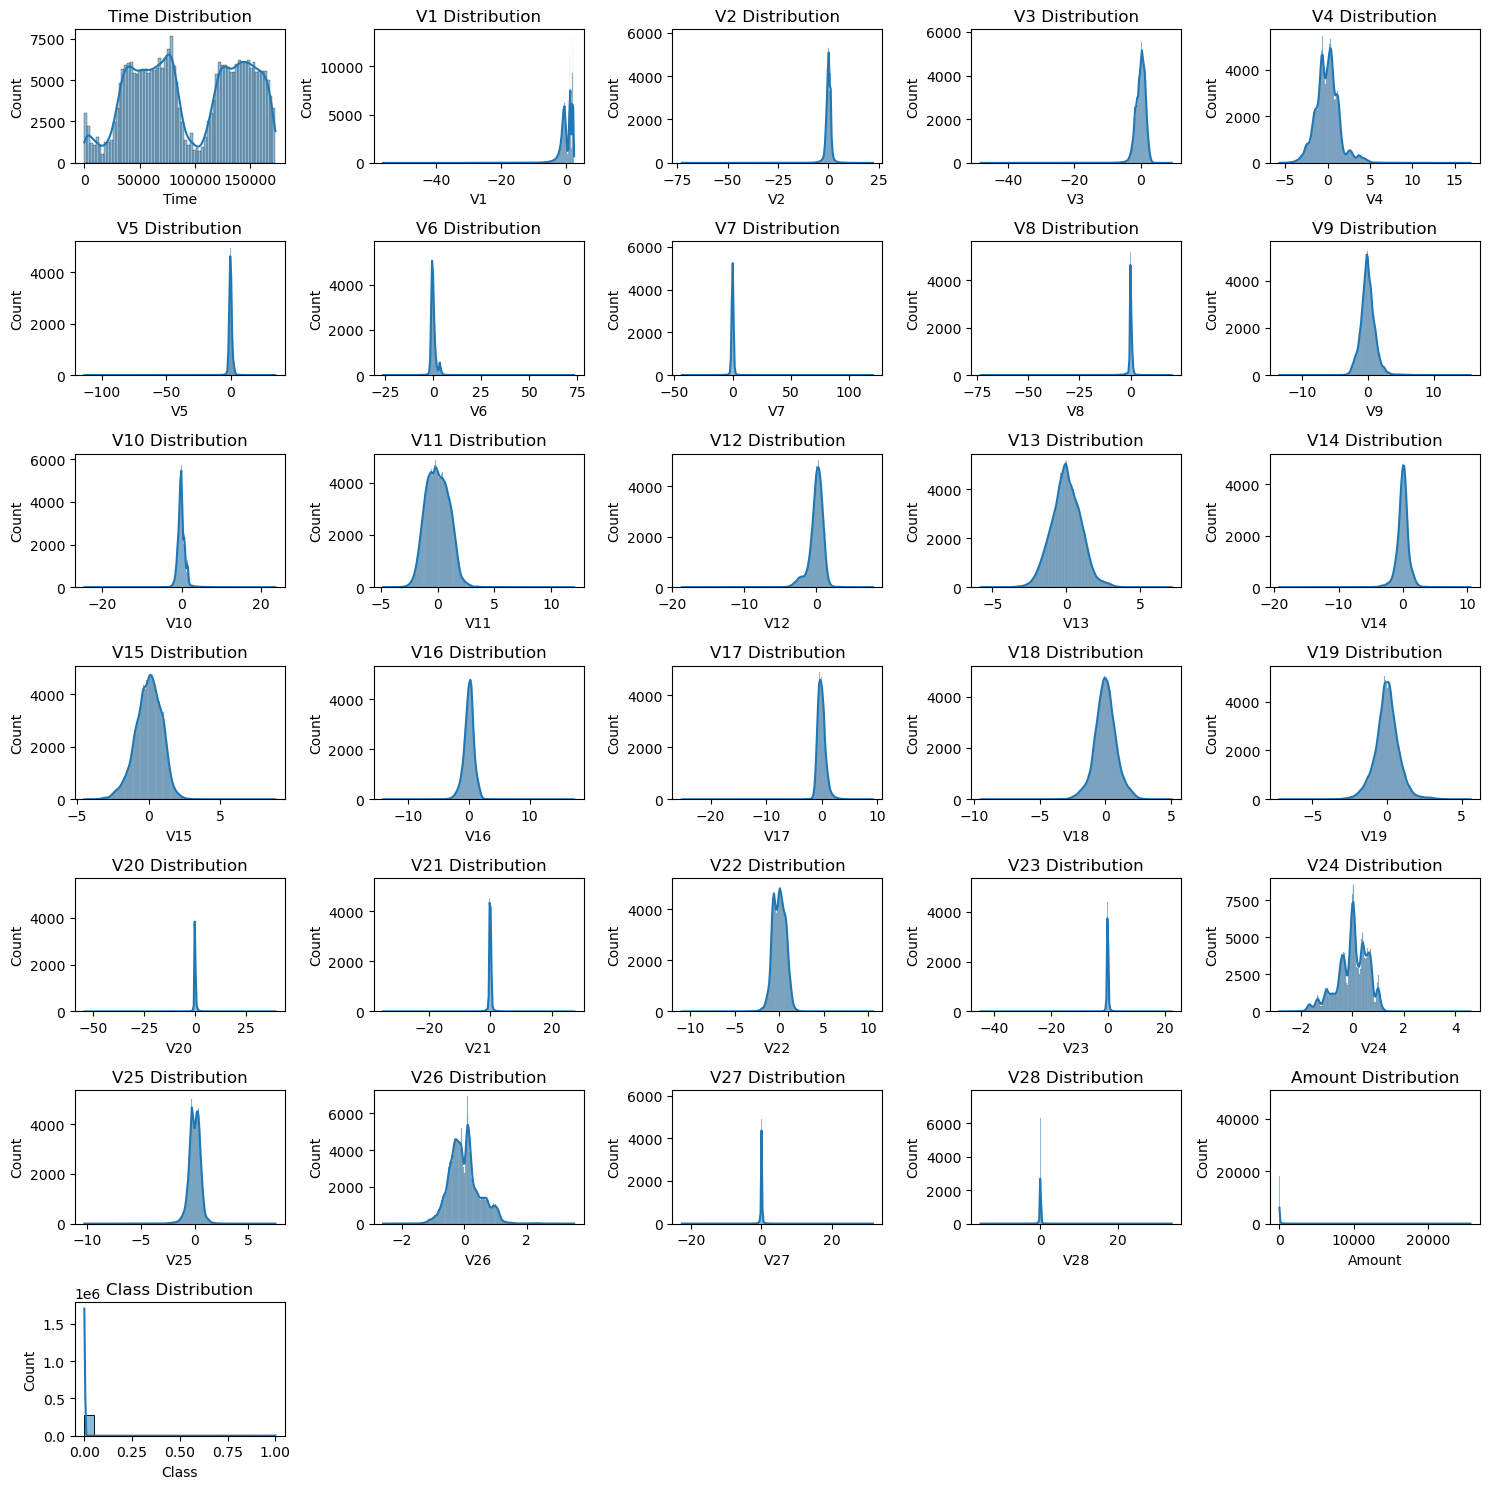

In [26]:
plt.figure(figsize=(15,15))
t = 1
for i in df.columns:
  plt.subplot(7,5,t)
  sns.histplot(df[i], kde= True)
  plt.title(i+' Distribution')
  t+= 1
plt.tight_layout()
plt.show()


Correlation between the columns

<Axes: >

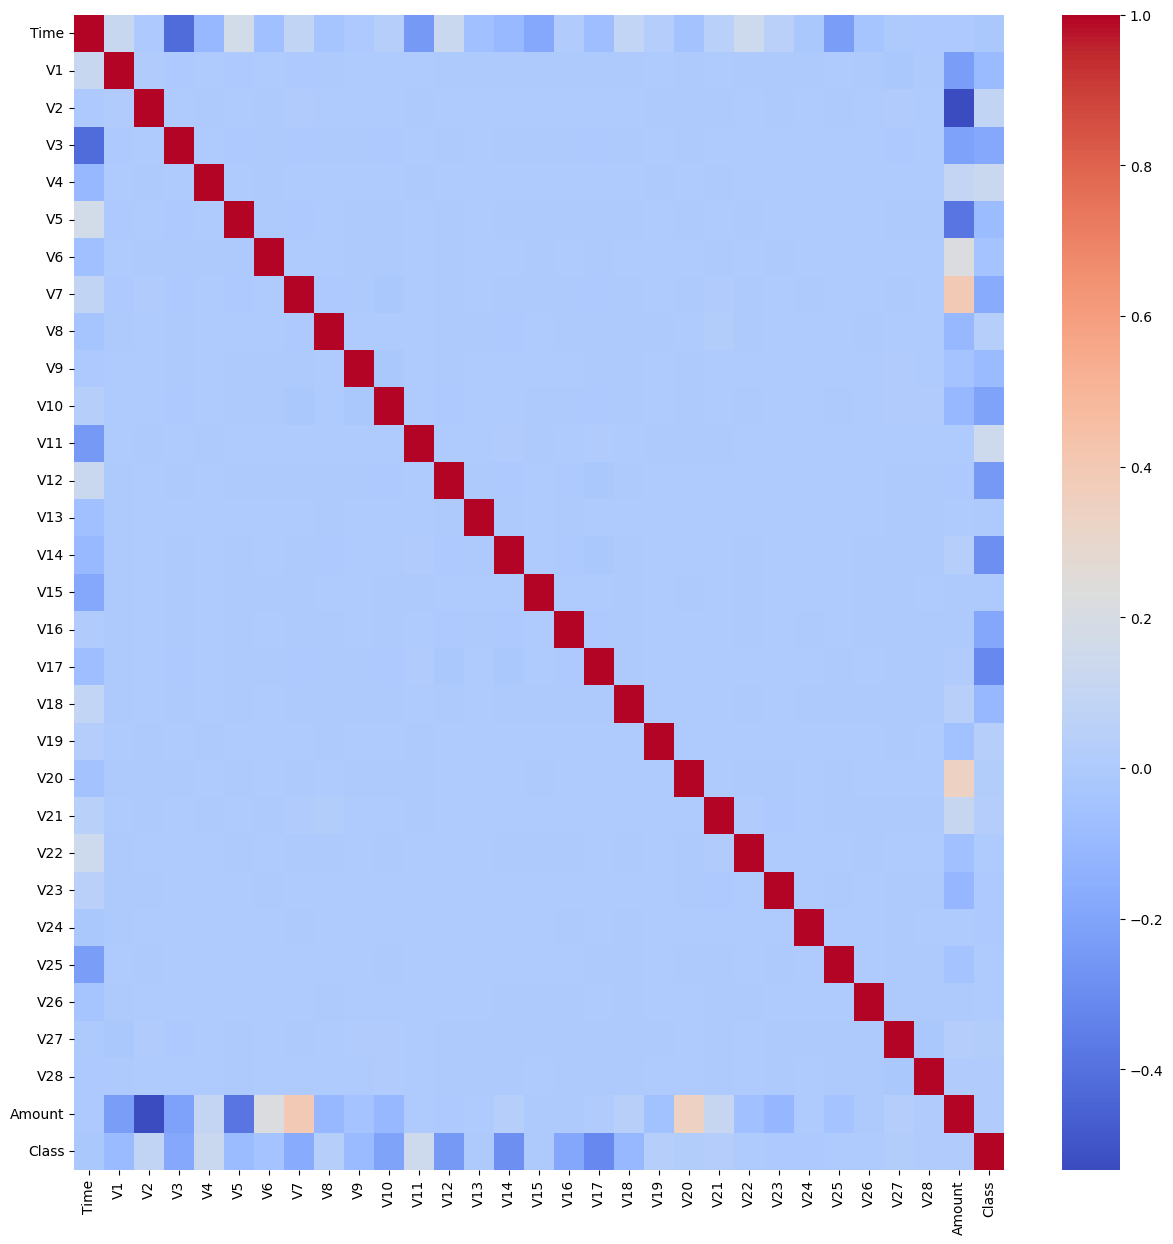

In [ ]:
df_corr = df.corr()
plt.figure(figsize =(15,15))
sns.heatmap(df_corr, annot= False, cmap='coolwarm')

<Axes: >

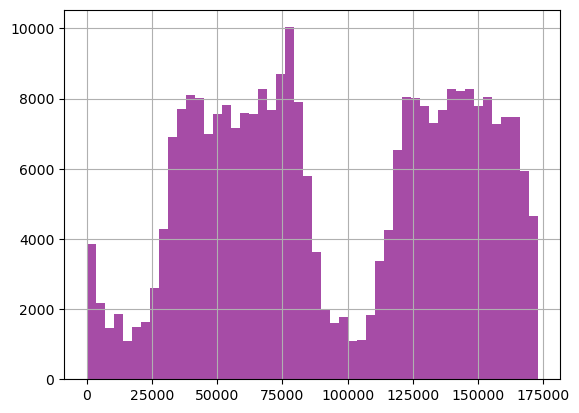

In [28]:
df['Time'].hist(bins = 50, color = 'purple', alpha = 0.7)

Cheacking for Null values

In [29]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Data Preprocessing

Handling the Unbalance dataset

In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verify class distribution after SMOTE
print("Original class distribution:", y_train.value_counts())
print("New class distribution after SMOTE:", y_train_smote.value_counts())


Original class distribution: Class
0    198269
1       339
Name: count, dtype: int64
New class distribution after SMOTE: Class
0    198269
1    198269
Name: count, dtype: int64


In [31]:
df.shape

(283726, 31)

Appling Smotennn to remove noise from the data 

In [33]:
from imblearn.combine import SMOTEENN

# Combine SMOTE and undersampling
smoteenn = SMOTEENN(random_state=42)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X, y)

# Verify class distribution
print("New class distribution after SMOTEENN:", y_smoteenn.value_counts())


New class distribution after SMOTEENN: Class
1    274848
0    263759
Name: count, dtype: int64


In [38]:
# Exporting the The data 
X_smoteenn.to_csv("X_train.csv",index=False)
y_smoteenn.to_csv("y_train.csv",index=False)
X_test.to_csv("X_test.csv",index=False)
y_test.to_csv("y_test.csv",index=False)